In [1]:
import pandas as pd
import sys
import os
from sentence_transformers import SentenceTransformer
import umap
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz

In [2]:
df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_tweets.csv',lineterminator='\n')
df = df[~df.text.str.match('^RT @')]
print(df.shape)
df.head()

(2498212, 4)


,id,created_at,text,author_id
0,1408295995507568642,2021-06-25 05:28:24+00:00,"‘’Today, it’s residents of inner-city Sydney t...",267570919
1,1413014175731773440,2021-07-08 05:56:46+00:00,“ Johnson is fed up with the rules. Collective...,267570919
2,1414403414679703554,2021-07-12 01:57:07+00:00,“It took a while for Reaganism to arrive in Au...,267570919
3,1430320029644455941,2021-08-25 00:04:03+00:00,“The question is not whether Australians want ...,267570919
4,1411115958031187973,2021-07-03 00:13:56+00:00,References to Morrison’s so called plan as cha...,267570919


In [3]:
author_df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/mdbs.csv').drop(columns="region").rename(columns={
    "id":"author_id",
    "person__party__name":"party",
    "seat_region_name":"region"
})
print(author_df.shape)
author_df.head()

(500, 9)


,author_id,person__id,screen_name,party,person__surname,person__first_name,person__in_parlperiod,parltype,region
0,20986770,77212,Diether_Dehm,linke,Dehm,Diether,"[12, 16, 17, 18, 19]",Bund,Lower Saxony
1,66750542,77461,fuchtel,cducsu,Fuchtel,Hans-Joachim,"[11, 12, 13, 14, 15, 16, 17, 18, 19]",Bund,Baden-Württemberg
2,888289790,77601,GregorGysi,linke,Gysi,Gregor,"[11, 12, 13, 14, 16, 17, 18, 19]",Bund,Berlin
3,2837971145,77866,UllaJelpke,linke,Jelpke,Ulla,"[12, 13, 14, 16, 17, 18, 19]",Bund,North Rhine-Westphalia
4,19286748,78274,matschie,spd,Matschie,Christoph,"[12, 13, 14, 15, 19]",Bund,Thuringia


In [4]:
df = df.merge(author_df[['author_id','region','party','parltype','person__surname','person__first_name']],how="inner")
print(df.shape)
df.head()

(1175809, 9)


,id,created_at,text,author_id,region,party,parltype,person__surname,person__first_name
0,1430095381593985024,2021-08-24 09:11:23+00:00,"@rainerfaus @bertpsch Ja, im Freundes- und Bek...",52024480,Bavaria,gruene,Bund,Janecek,Dieter
1,1433332723985391616,2021-09-02 07:35:26+00:00,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",52024480,Bavaria,gruene,Bund,Janecek,Dieter
2,1424857024454696968,2021-08-09 22:16:01+00:00,„Baerbocks Rede dreht sich zunächst vor allem ...,52024480,Bavaria,gruene,Bund,Janecek,Dieter
3,1430058016997617683,2021-08-24 06:42:55+00:00,"Ich freue mich, kommenden Montag die Spitzenka...",52024480,Bavaria,gruene,Bund,Janecek,Dieter
4,1407098021989470218,2021-06-21 22:08:05+00:00,Wenn der Technologieturbo so gut funktioniert ...,52024480,Bavaria,gruene,Bund,Janecek,Dieter


In [5]:

if "created_at" in df.columns:
    df.created_at = pd.to_datetime(df['created_at'])
    df = df.set_index('created_at')

cutoff = datetime.datetime(2021,1,1,tzinfo=pytz.UTC)
df = df[df.index>cutoff]
print(df.shape)
df.head()

(166362, 8)


,id,text,author_id,region,party,parltype,person__surname,person__first_name
created_at,,,,,,,,
2021-08-24 09:11:23+00:00,1430095381593985024,"@rainerfaus @bertpsch Ja, im Freundes- und Bek...",52024480,Bavaria,gruene,Bund,Janecek,Dieter
2021-09-02 07:35:26+00:00,1433332723985391616,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",52024480,Bavaria,gruene,Bund,Janecek,Dieter
2021-08-09 22:16:01+00:00,1424857024454696968,„Baerbocks Rede dreht sich zunächst vor allem ...,52024480,Bavaria,gruene,Bund,Janecek,Dieter
2021-08-24 06:42:55+00:00,1430058016997617683,"Ich freue mich, kommenden Montag die Spitzenka...",52024480,Bavaria,gruene,Bund,Janecek,Dieter
2021-06-21 22:08:05+00:00,1407098021989470218,Wenn der Technologieturbo so gut funktioniert ...,52024480,Bavaria,gruene,Bund,Janecek,Dieter


In [6]:
tweets_per_author = df.groupby('author_id')['id'].nunique().to_frame().reset_index().rename(columns={
    "id":"Number of tweets in 2021"
})
tweets_per_author

,author_id,Number of tweets in 2021
0,14784765,5483
1,15630931,2036
2,15686106,398
3,15722010,422
4,15943222,322
...,...,...
422,1001837201276235777,278
423,1003656299589132291,307
424,1006099793888841729,22
425,1009457791554281473,88


In [7]:
df = df[df.index.hour<12]
df = df[df.index.hour>2]
df['time'] = df.index.hour+df.index.minute/60
df.head()

,id,text,author_id,region,party,parltype,person__surname,person__first_name,time
created_at,,,,,,,,,
2021-08-24 09:11:23+00:00,1430095381593985024,"@rainerfaus @bertpsch Ja, im Freundes- und Bek...",52024480,Bavaria,gruene,Bund,Janecek,Dieter,9.183333
2021-09-02 07:35:26+00:00,1433332723985391616,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",52024480,Bavaria,gruene,Bund,Janecek,Dieter,7.583333
2021-08-24 06:42:55+00:00,1430058016997617683,"Ich freue mich, kommenden Montag die Spitzenka...",52024480,Bavaria,gruene,Bund,Janecek,Dieter,6.700000
2021-06-23 11:42:48+00:00,1407665439942098946,@Frau_Empty @Pottfamilie Sie können ja entgege...,52024480,Bavaria,gruene,Bund,Janecek,Dieter,11.700000
2021-09-02 07:23:12+00:00,1433329646997753857,„#Klimaschutz wird aus Schrott gemacht“ 😉 http...,52024480,Bavaria,gruene,Bund,Janecek,Dieter,7.383333


In [8]:
df.groupby([df.author_id,df.index.date]).first().reset_index()

,author_id,level_1,id,text,region,party,parltype,person__surname,person__first_name,time
0,14784765,2021-01-01,1344937321234395136,#Merz ist ein wirtschaftliches Risiko für 🇩🇪 W...,Hamburg,linke,Bund,De Masi,Fabio,9.383333
1,14784765,2021-01-02,1345322398162317312,Wir sollten daher Energie darauf richten wie w...,Hamburg,linke,Bund,De Masi,Fabio,10.883333
2,14784765,2021-01-03,1345683239286038530,Umwälzungen im Zahlungsverkehr verursachen „ho...,Hamburg,linke,Bund,De Masi,Fabio,10.783333
3,14784765,2021-01-04,1346046371539918848,"@nikilmukerji @katjakipping Ja, es ist kein sc...",Hamburg,linke,Bund,De Masi,Fabio,10.833333
4,14784765,2021-01-06,1346779318056349696,Da Herr Habeck nicht erklären kann wie er mit ...,Hamburg,linke,Bund,De Masi,Fabio,11.383333
...,...,...,...,...,...,...,...,...,...,...
28105,1019846605044936705,2021-08-25,1430385610305458176,"Tolle Frau, tolles Konzept, mega-tolles Essen....",Bavaria,cducsu,Bund,Ludwig,Daniela,4.400000
28106,1019846605044936705,2021-08-26,1430822862294851586,Ein Rauchstopp ist immer eine gute Idee – in d...,Bavaria,cducsu,Bund,Ludwig,Daniela,9.366667
28107,1019846605044936705,2021-08-27,1431179856264507393,Start unserer Plakataktion in vielen Bahnhöfen...,Bavaria,cducsu,Bund,Ludwig,Daniela,9.000000
28108,1019846605044936705,2021-08-31,1432631222199586816,Gratulation zum Projektabschluss! #aktionberat...,Bavaria,cducsu,Bund,Ludwig,Daniela,9.116667


In [9]:
#df = df.sort_values("index")#.reset_index()
df = df.groupby([df.author_id,df.index.date]).first().reset_index()#.set_index('created_at')
df.head()

,author_id,level_1,id,text,region,party,parltype,person__surname,person__first_name,time
0,14784765,2021-01-01,1344937321234395136,#Merz ist ein wirtschaftliches Risiko für 🇩🇪 W...,Hamburg,linke,Bund,De Masi,Fabio,9.383333
1,14784765,2021-01-02,1345322398162317312,Wir sollten daher Energie darauf richten wie w...,Hamburg,linke,Bund,De Masi,Fabio,10.883333
2,14784765,2021-01-03,1345683239286038530,Umwälzungen im Zahlungsverkehr verursachen „ho...,Hamburg,linke,Bund,De Masi,Fabio,10.783333
3,14784765,2021-01-04,1346046371539918848,"@nikilmukerji @katjakipping Ja, es ist kein sc...",Hamburg,linke,Bund,De Masi,Fabio,10.833333
4,14784765,2021-01-06,1346779318056349696,Da Herr Habeck nicht erklären kann wie er mit ...,Hamburg,linke,Bund,De Masi,Fabio,11.383333


In [11]:
authors = (df.groupby(["author_id"])['time']
           .mean().sort_values().to_frame()
           .reset_index().merge(author_df,how="left")
           .merge(tweets_per_author)
          )
authors.groupby('region')['time'].mean().sort_values()

region
Brandenburg               8.908002
Hesse                     8.986177
Mecklenburg-Vorpommern    9.036268
Saxony-Anhalt             9.077563
Berlin                    9.130260
Baden-Württemberg         9.170603
Saarland                  9.197886
Rheinland-Pfalz           9.262442
Bavaria                   9.323333
Saxony                    9.340786
Lower Saxony              9.347718
North Rhine-Westphalia    9.367356
Thuringia                 9.392903
Schleswig-Holstein        9.406944
Bremen                    9.550388
Hamburg                   9.599866
Name: time, dtype: float64

In [12]:
cdict = {'afd': '#009EE0',
 'bp': None,
 'cducsu': '#000000',
 'dp': None,
 'drp': None,
 'dzp': None,
 'fdp': '#FFED00',
 'fraktionslos': None,
 'gb/bhe': None,
 'gruene': '#64A12D',
 'kpd': None,
 'linke': '#8C3473',
 'other': None,
 'parteilos': None,
 'pds': None,
 'spd': '#EB001F',
 'wav': None}

In [13]:
region_times = df.groupby(["region"])['time'].mean().sort_values().to_frame()
def convert_time(x):
    parts = str(x).split(".")
    hours = parts[0]
    seconds = float(f"0.{parts[1]}")/100*60
    return f"{hours}:{int(round(seconds,2)*100):02d}"

region_times["Average time of first tweet"] = region_times['time'].apply(convert_time)
region_times.to_csv('results/region_times.csv')
region_times

,time,Average time of first tweet
region,,
Hesse,8.881084,8:53
Brandenburg,8.884737,8:53
Saarland,8.909618,8:55
Schleswig-Holstein,8.998796,8:60
Saxony-Anhalt,9.002437,9:00
Hamburg,9.101094,9:06
Rheinland-Pfalz,9.103616,9:06
Berlin,9.123223,9:07
Saxony,9.153739,9:09


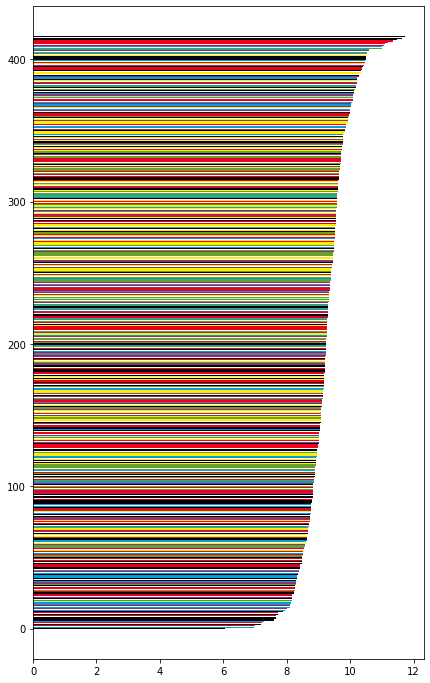

In [14]:
authors = authors.sort_values('time')
fig, ax = plt.subplots(figsize=(7,12))
for i, row in authors.iterrows():
    ax.barh(i,row["time"],color=cdict[row["party"]])

In [15]:
party_times = df.groupby(["party"])['time'].mean().sort_values().to_frame()
party_times["Average time of first tweet"] = party_times['time'].apply(convert_time)
party_times.to_csv('results/party_times.csv')
party_times

,time,Average time of first tweet
party,,
cducsu,8.971695,8:57
spd,8.998923,8:60
afd,9.097263,9:06
linke,9.188097,9:11
gruene,9.231879,9:14
fdp,9.292045,9:18


In [16]:
authors["Average time of first tweet"] = authors['time'].apply(convert_time)
authors.to_csv('results/author_times.csv')
authors

,author_id,time,person__id,screen_name,party,person__surname,person__first_name,person__in_parlperiod,parltype,region,Number of tweets in 2021,Average time of first tweet
0,1334019378,6.050000,80004,CvStetten,cducsu,Stetten,Christian,"[15, 16, 17, 18, 19]",Bund,Baden-Württemberg,5,6:03
1,824210890354520064,6.983333,80811,ProfMaier,afd,Maier,Lothar,[19],Bund,Baden-Württemberg,4,6:59
2,77928749,6.996667,80498,jungeinberlin,spd,Junge,Frank,"[18, 19]",Bund,Mecklenburg-Vorpommern,13,6:60
3,23447001,7.183333,80317,AMattfeldt,cducsu,Mattfeldt,Andreas,"[17, 18, 19]",Bund,Lower Saxony,4,7:11
4,2226815116,7.217574,80588,Schwarz_MdB,spd,Schwarz,Andreas,"[18, 19]",Bund,Bavaria,976,7:13
...,...,...,...,...,...,...,...,...,...,...,...,...
412,786498202832822272,11.188889,80418,HellmichMdB,spd,Hellmich,Wolfgang,"[17, 18, 19]",Bund,North Rhine-Westphalia,18,11:11
413,1356753444,11.358333,80873,jschraps,spd,Schraps,Johannes,[19],Bund,Lower Saxony,8,11:22
414,928974816220254208,11.483333,80282,axel_knoerig,cducsu,Knoerig,Axel,"[17, 18, 19]",Bund,Lower Saxony,1,11:28
415,160906608,11.650000,79715,Axel_Fischer,cducsu,Fischer,Axel E.,"[14, 15, 16, 17, 18, 19]",Bund,Baden-Württemberg,3,11:39
